In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
px.scatter(data,"age","chol",color="target")

In [ ]:
data['high_col'] = data['chol'] > 230
data['high_col']= data['high_col'].replace(True,1)
data['high_col'] = data['high_col'].replace(False,0)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,high_col
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1


In [ ]:
px.scatter(data,"trestbps","chol",color="target")

In [ ]:
data = data[data["chol"]<350]

In [ ]:
px.scatter(data,"trestbps","chol",color="target")

In [ ]:
print("Max Age: " +str(data['age'].max()))
print("Min age: " + str(data['age'].min()))

Max Age: 77
Min age: 29


In [ ]:
px.scatter(data,"thalach","chol",color="target")

In [ ]:
corr_matrix = data.corr()
fig = px.imshow(corr_matrix,
                x=corr_matrix.columns,
                y=corr_matrix.index,
                color_continuous_scale="RdBu_r",
                title="Correlation Matrix")
fig.show()


In [ ]:
px.scatter(data,"age","chol",color="target")

In [ ]:
px.scatter(data,"oldpeak","age",color="target")

In [ ]:
px.scatter(data,"oldpeak","trestbps",color="target")

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
high_col    0
dtype: int64

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
non_features = ["target","high_col"]
Features = [	"age",	"sex"	,"cp"	,"trestbps"	,"chol"	,"fbs"	,"restecg"	,"thalach",	"exang",	"oldpeak",	"slope",	"ca",	"thal","high_col"]
features = data.drop(non_features,axis=1)
Target = data.drop(features,axis=1)
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
Target.head()
Target = Target.drop("high_col",axis=1)

In [ ]:
features.sum()

age          54207.0
sex            709.0
cp             948.0
trestbps    131347.0
chol        241616.0
fbs            150.0
restecg        536.0
thalach     148884.0
exang          335.0
oldpeak       1056.8
slope         1385.0
ca             748.0
thal          2316.0
dtype: float64

In [ ]:
Target.sum()

target    511
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, Target, test_size=0.2)
y_train.head()

,target
457,1
982,1
87,0
781,0
865,1


In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
457,39,0,2,138,220,0,1,152,0,0.0,1,0,2
982,67,0,0,106,223,0,1,142,0,0.3,2,2,2
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2
781,58,1,0,146,218,0,1,105,0,2.0,1,1,3
865,60,0,3,150,240,0,1,171,0,0.9,2,0,2


In [ ]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
715,70,1,1,156,245,0,0,143,0,0.0,2,0,2
418,62,0,0,124,209,0,1,163,0,0.0,2,0,2
752,48,1,1,130,245,0,0,180,0,0.2,1,0,2
774,48,0,2,130,275,0,1,139,0,0.2,2,0,2
858,68,0,2,120,211,0,0,115,0,1.5,1,0,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
y_train = y_train.to_numpy()
y_train = y_train.ravel()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


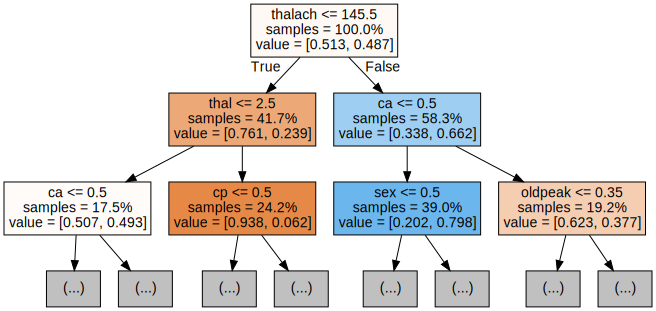

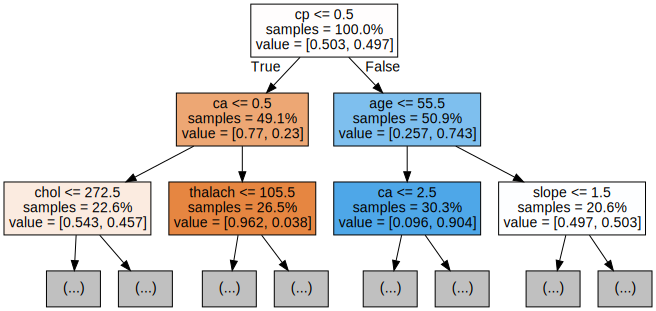

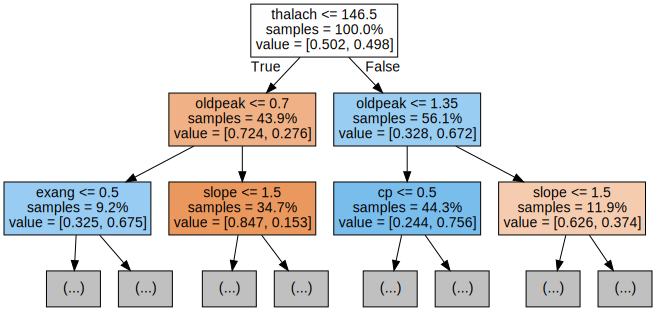

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


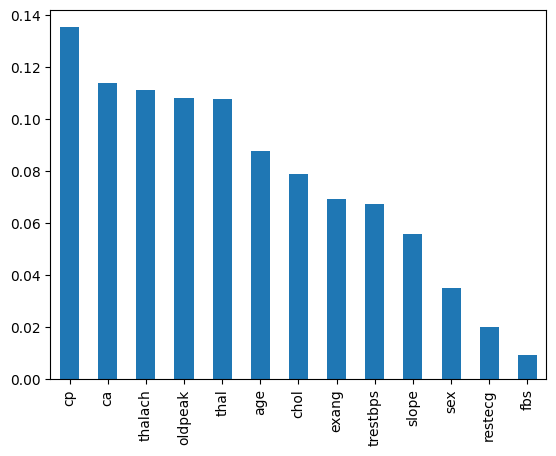

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)


rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)


feature_importances.plot.bar();

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       101
           1       1.00      0.97      0.98        99

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [ ]:
data["health_score"] = data["age"]	+data["cp"] +data["thalach"]+data["ca"]+data["thal"]
px.scatter(data,"target","health_score")

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(1, 10))
# data_numbpy = data["health_score"].to_numpy()
# data_numbpy = data_numbpy.reshape(-1,1)
# fit_data = scaler.fit_transform(data_numbpy)
# fit_data = fit_data.flatten().astype(int)
# data["health_score"] = fit_data

In [ ]:
# data["health_score"].head()


In [ ]:
importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})
print(feature_importance_df)

     Feature  Importance
0        age    0.090919
1        sex    0.032803
2         cp    0.155088
3   trestbps    0.065183
4       chol    0.086799
5        fbs    0.009923
6    restecg    0.019277
7    thalach    0.099937
8      exang    0.059312
9    oldpeak    0.110977
10     slope    0.056834
11        ca    0.116662
12      thal    0.096287


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/heart.csv")
data.head()
data.drop("target",axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
import pandas as pd

# Feature weights
feature_weights = {
    'cp': 0.125064,
    'thal': 0.113847,
    'ca': 0.113568,
    'thalach': 0.109699,
    'oldpeak': 0.106424,
    'age': 0.094898,
    'chol': 0.077655,
    'trestbps': 0.074653,
    'exang': 0.065335,
    'slope': 0.050301,
    'sex': 0.032074,
    'restecg': 0.025715,
    'fbs': 0.010766
}


data['weighted_sum'] = data.apply(lambda row: sum(row[feature] * weight for feature, weight in feature_weights.items()), axis=1)


min_weighted_sum = data['weighted_sum'].min()
max_weighted_sum = data['weighted_sum'].max()


data['heart_health_score'] = 10 * (data['weighted_sum'] - min_weighted_sum) / (max_weighted_sum - min_weighted_sum)


data.loc[data['target'] == 1, 'heart_health_score'] = data.loc[data['target'] == 1, 'heart_health_score'].clip(lower=5)
data.loc[data['target'] == 0, 'heart_health_score'] = data.loc[data['target'] == 0, 'heart_health_score'].clip(upper=4)


data['heart_health_score'] = data['heart_health_score'].round().astype(int)


data.drop('weighted_sum', axis=1, inplace=True)


print(data)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  heart_health_score  
0         2   2     3  

In [ ]:
data.head()
px.scatter(data,"target","heart_health_score")

In [ ]:
non_features = ["heart_health_score","target"]
Features = [	"age",	"sex"	,"cp"	,"trestbps"	,"chol"	,"fbs"	,"restecg"	,"thalach",	"exang",	"oldpeak",	"slope",	"ca",	"thal","target"]

In [ ]:
features = data.drop(non_features,axis=1)
Target = data.drop(features,axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, Target, test_size=0.2)

X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
764,63,1,0,140,187,0,0,144,1,4.0,2,2,3
935,56,1,1,120,240,0,1,169,0,0.0,0,0,2
336,57,1,2,150,126,1,1,173,0,0.2,2,1,3
969,52,1,1,120,325,0,1,172,0,0.2,2,0,2
650,62,1,0,120,267,0,1,99,1,1.8,1,2,3


In [ ]:
y_train = y_train.drop("target",axis=1)

In [ ]:
y_train = y_train.to_numpy()
y_train = y_train.ravel()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
y_test.drop("target",axis=1)

,heart_health_score
924,4
108,4
130,5
1017,2
90,5
...,...
914,2
943,5
437,3
597,5


In [ ]:
y_test.head()

,target,heart_health_score
924,0,4
108,0,4
130,1,5
1017,0,2
90,1,5


In [ ]:
y_test = y_test.drop("target",axis=1)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
y_pred

array([4, 4, 5, 2, 5, 3, 5, 5, 3, 0, 5, 4, 4, 6, 5, 5, 5, 5, 3, 5, 5, 3,
       5, 4, 1, 3, 5, 1, 5, 5, 5, 5, 3, 1, 4, 5, 5, 3, 3, 4, 4, 3, 5, 3,
       5, 5, 3, 2, 5, 5, 5, 5, 5, 3, 5, 5, 3, 4, 5, 7, 5, 5, 1, 3, 5, 4,
       5, 5, 5, 3, 5, 5, 5, 2, 5, 6, 4, 3, 5, 5, 5, 3, 5, 1, 4, 2, 4, 5,
       5, 3, 5, 5, 2, 4, 5, 3, 3, 4, 3, 5, 4, 3, 2, 3, 5, 5, 5, 2, 3, 3,
       5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 5,
       3, 3, 3, 4, 4, 5, 4, 2, 5, 4, 3, 3, 3, 5, 2, 5, 3, 5, 1, 4, 4, 5,
       5, 2, 3, 2, 0, 2, 5, 5, 1, 6, 3, 2, 3, 7, 2, 3, 5, 5, 6, 6, 5, 5,
       5, 4, 2, 5, 4, 4, 3, 5, 4, 4, 5, 5, 5, 5, 5, 3, 0, 5, 5, 5, 2, 5,
       5, 5, 2, 5, 3, 5, 4])

In [ ]:
data.to_csv("/content/data/hello.csv")

OSError: Cannot save file into a non-existent directory: '/content/data'

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)